In [1]:
from matplotlib import pyplot as plt #plotting
import pandas as pd #useful toolkit

#warnings make some parts a bit unreadable, getting Jupyter to omit them
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read datasets
postures = pd.read_csv("datasets/Postures.csv", na_values="?")
diabetes = pd.read_csv("datasets/diabetes_data_upload.csv")

#split into X and Y
posturesX = postures.copy()
posturesX = posturesX.drop("Class", axis=1)
posturesY = postures["Class"]

diabetesX = diabetes.copy()
diabetesX = diabetesX.drop("class", axis=1)
diabetesY = diabetes["class"]

# Postures

## X_, Y_, and Z_ columns:

We can see much more noise in the final attributes compared to the first one because the final ones have more missing values.

We don't need to include all of those in the Exercise 0 report, but we could pick out a few like the first ones and the last one.

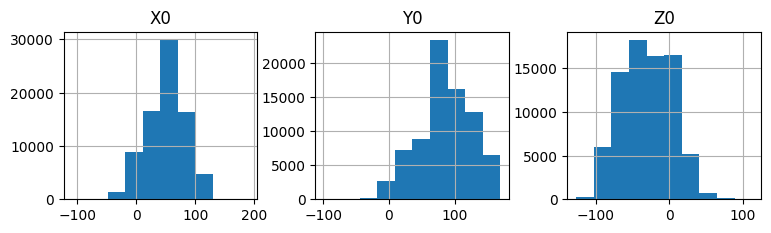

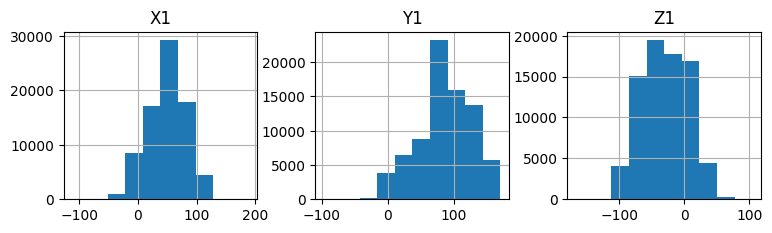

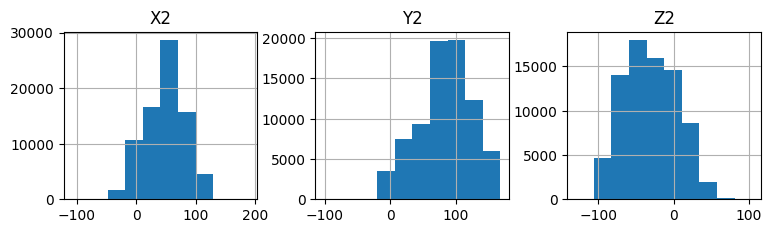

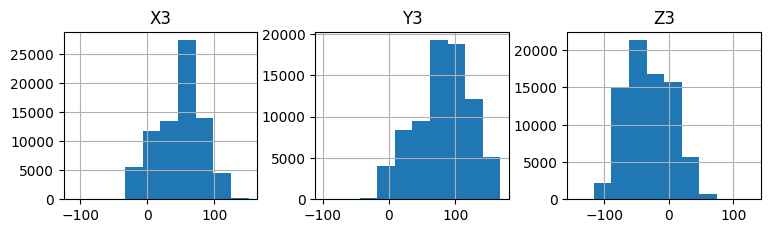

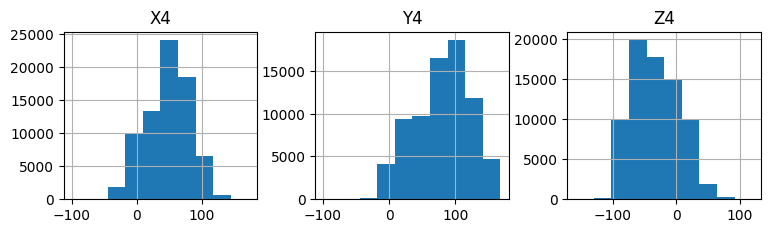

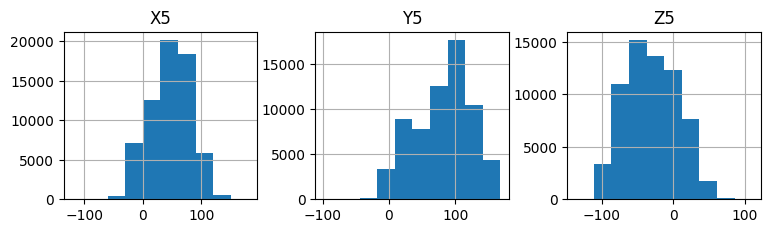

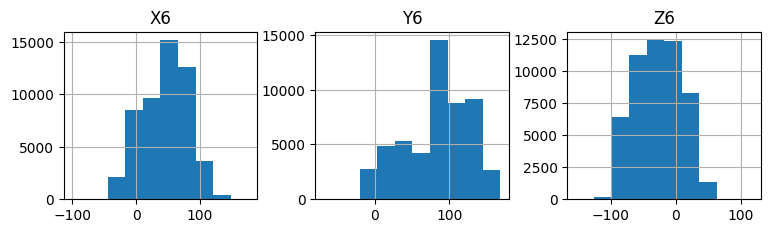

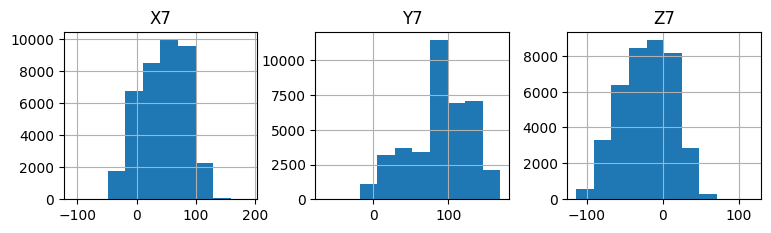

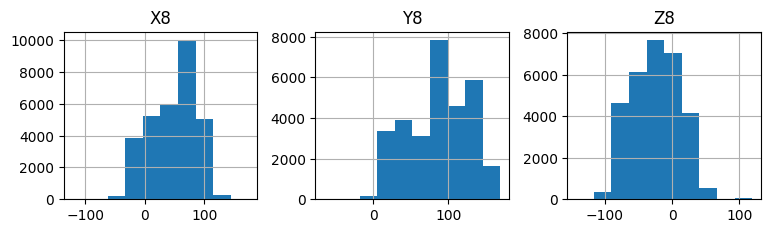

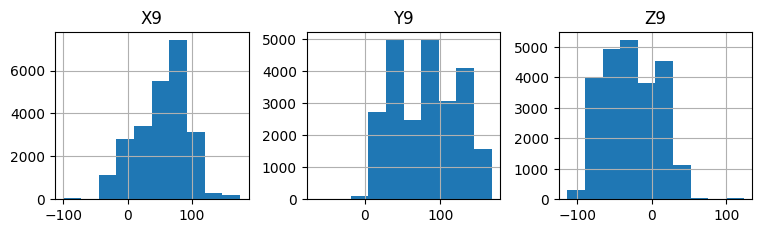

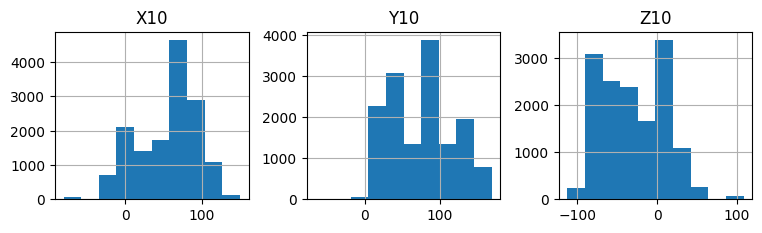

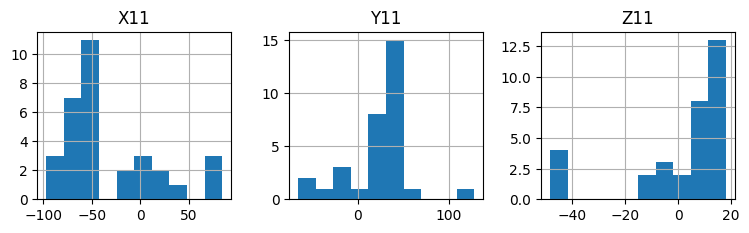

In [3]:
#Plots for the X, Y and Z columns in the dataset
postures_cols = list(posturesX.columns)
for j in [str(m) for m in range(12)]:
    cols = []
    #for i in range(11):
    #    cnt = i + 1
    #    cols.append(j + str(cnt))
    #fig,ax = plt.subplots()
    fig = plt.figure(figsize = (9,5))
    ax = fig.gca()
    _ = ax.axis('tight')
    _ = ax.axis('off')
    _ = posturesX[["X"+j, "Y"+j, "Z"+j]].hist(ax=ax, layout=(2,3))
    #_ = posturesX[postures_cols[j*7:j*7+7]].hist(ax=ax, layout=(2,11))

## Users

We have 15 users. The paper suggests we use the leave-one-user-out method for testing purposes. The following plot reveals how Users 4 and 7 have very little data to add and the test set results are likely to be (much) more volatile compared to leaving the other users out.

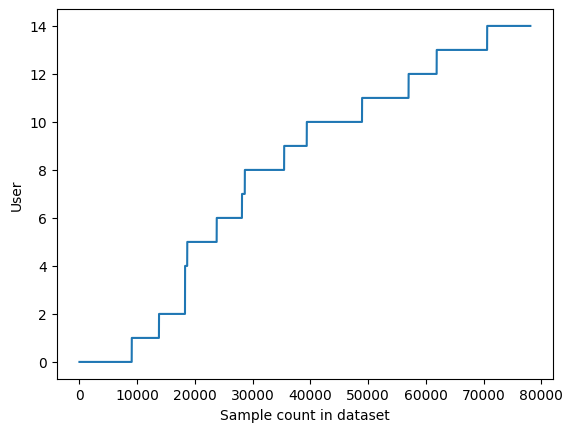

In [4]:
fig, ax = plt.subplots()
_ = ax.plot(posturesX["User"])
_ = ax.set_xlabel("Sample count in dataset")
_ = ax.set_ylabel("User")

## Label

For my analysis I colored the features plots blue and the labels plots for easier distinction.

We can see how hand gestures 1-5 are normally followed sequentially in the same order for every user.

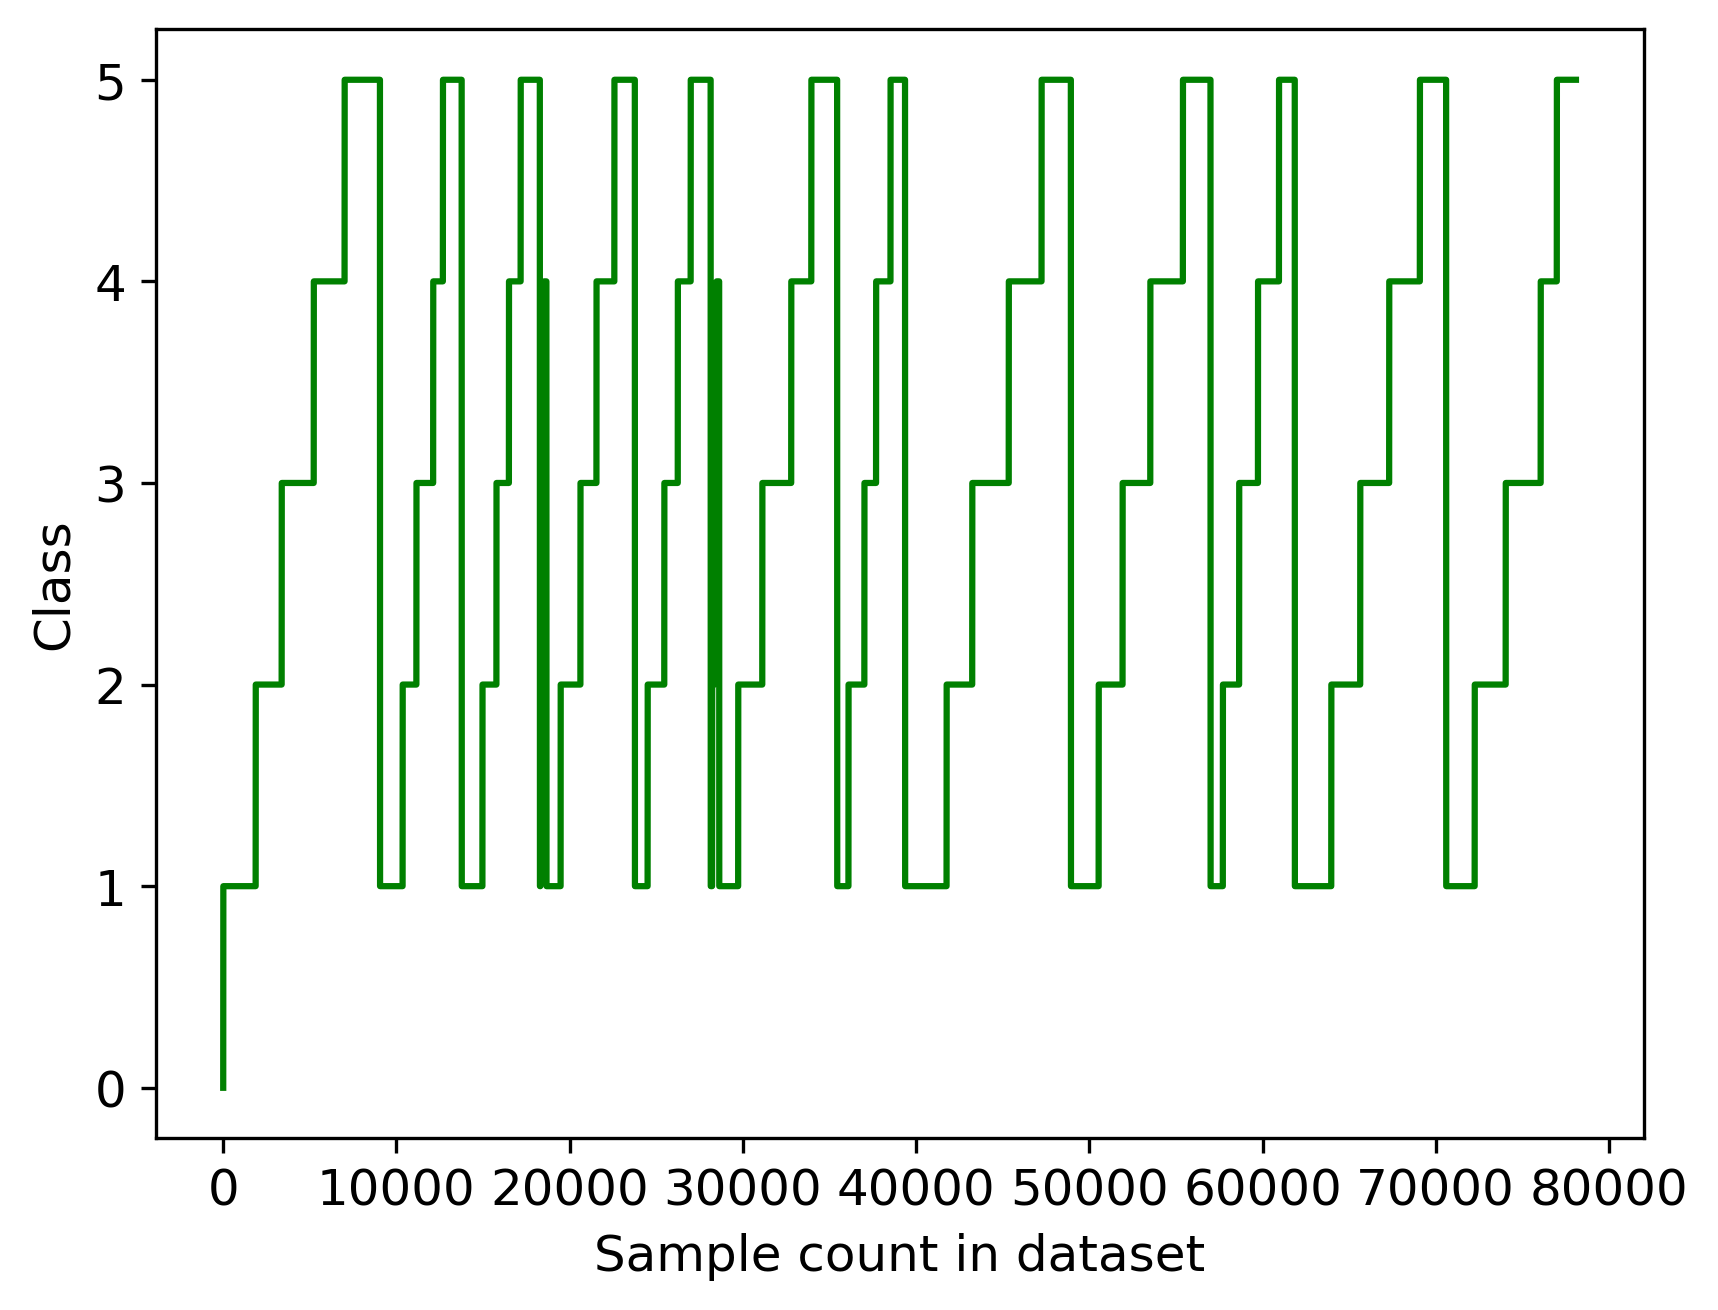

In [212]:
fig, ax = plt.subplots()
_ = ax.plot(posturesY, color="green")
_ = ax.set_xlabel("Sample count in dataset")
_ = ax.set_ylabel("Class")

Counts per output value. Used a barplot here as a histogram would have a bit of a weird alignment where it isn't as clear which bar belongs to which value.

<BarContainer object of 6 artists>

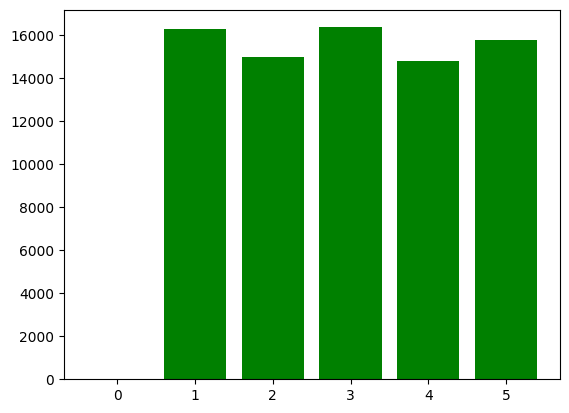

In [25]:
fig, ax = plt.subplots()
ax.bar(posturesY.value_counts().index.values, posturesY.value_counts().to_list(), color="green")

## Different hand movements with different users 



What we can see is that the distributions of the X_ and Y_ coordinate markers are different for users. It could make sense to standardize distributions per user.

User 0:

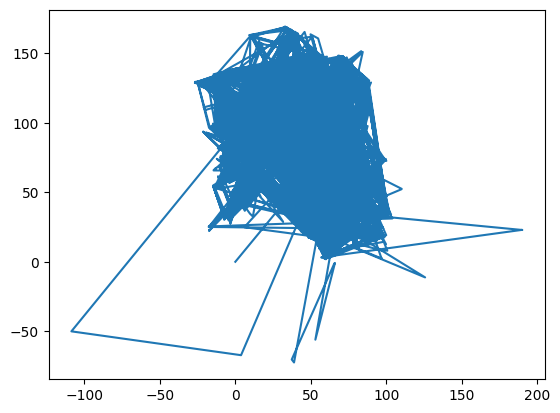

In [155]:
fig, ax = plt.subplots()
filteredUser = posturesX[posturesX["User"] == 0]
ax.plot(filteredUser["X0"], filteredUser["Y0"])

User 1:

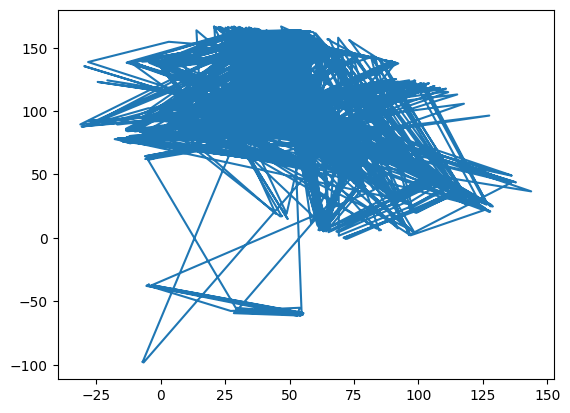

In [154]:
fig, ax = plt.subplots()
filteredUser = posturesX[posturesX["User"] == 1]
ax.plot(filteredUser["X0"], filteredUser["Y0"])

User 2:

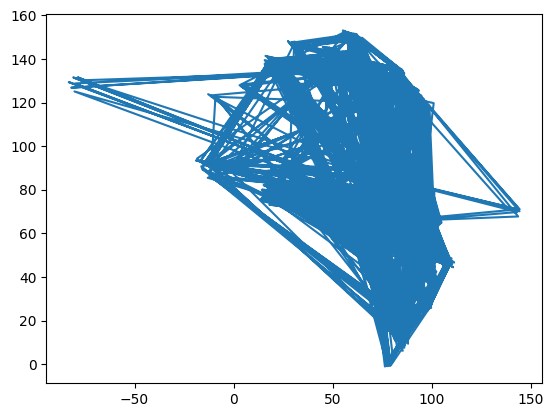

In [157]:
fig, ax = plt.subplots()
filteredUser = posturesX[posturesX["User"] == 2]
ax.plot(filteredUser["X0"], filteredUser["Y0"])

# Diabetes dataset

## Histograms

X axis

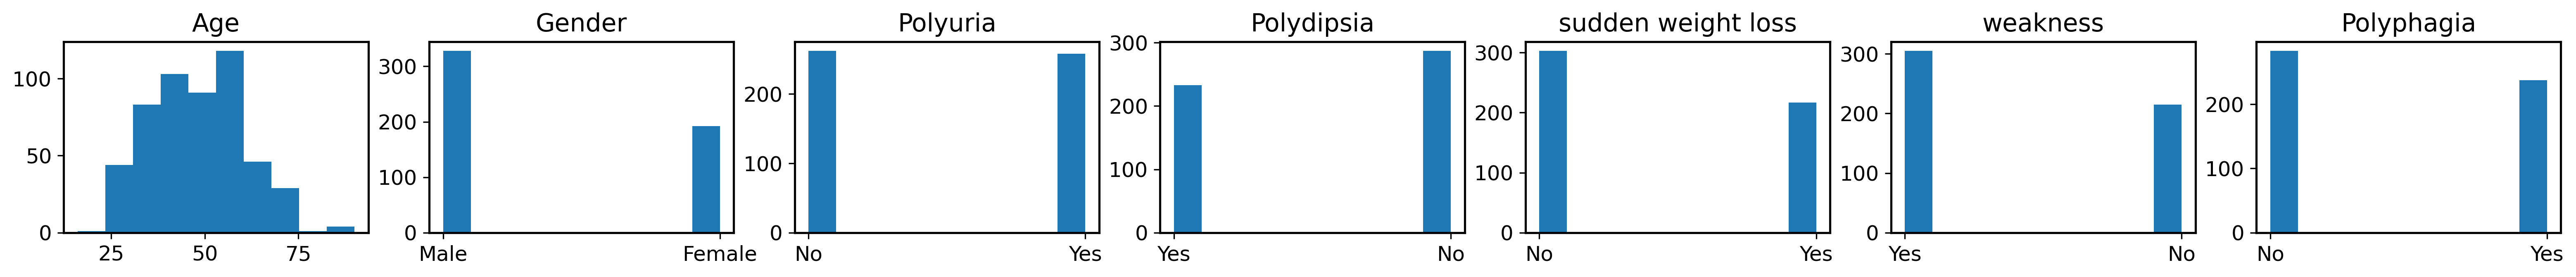

In [167]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

plt.rcParams.update({'font.size': 12})

fig, axes = plt.subplots(ncols=7, figsize = (26,2))
for i in enumerate(list(diabetes.columns)[:7]):
    for axis in ['top','bottom','left','right']:
        _ = axes[i[0]].spines[axis].set_linewidth(1.25)
    _ = axes[i[0]].hist(diabetes[i[1]])
    _ = axes[i[0]].set_title(i[1])

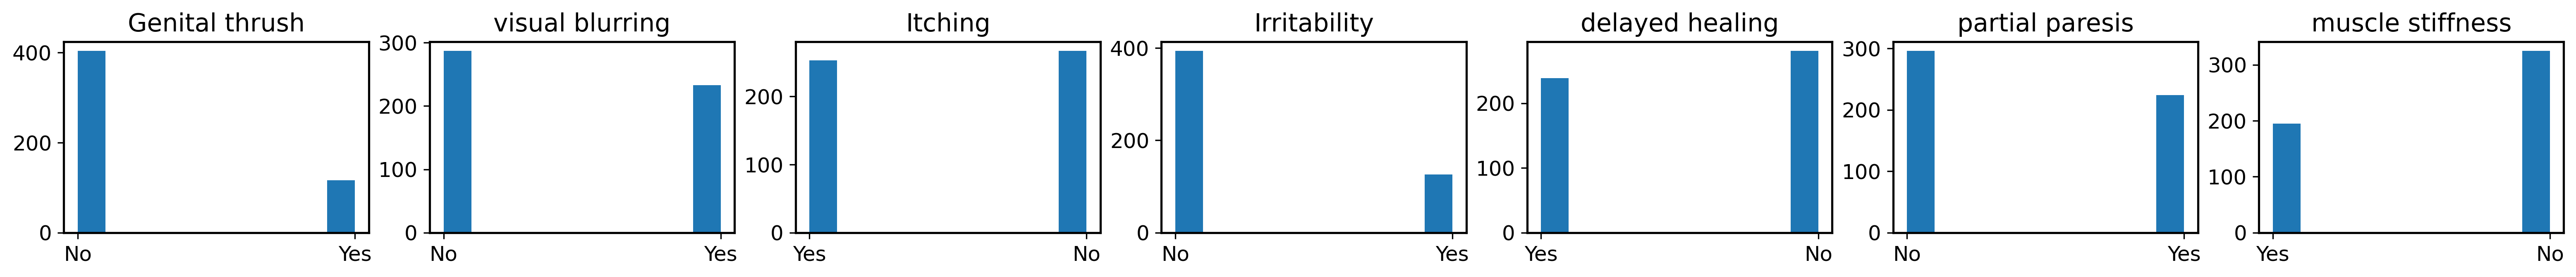

In [197]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

plt.rcParams.update({'font.size': 12})

fig, axes = plt.subplots(ncols=7, figsize = (26,2))
for i in enumerate(list(diabetes.columns)[7:14]):
    for axis in ['top','bottom','left','right']:
        _ = axes[i[0]].spines[axis].set_linewidth(1.25)
    _ = axes[i[0]].hist(diabetes[i[1]])
    _ = axes[i[0]].set_title(i[1])

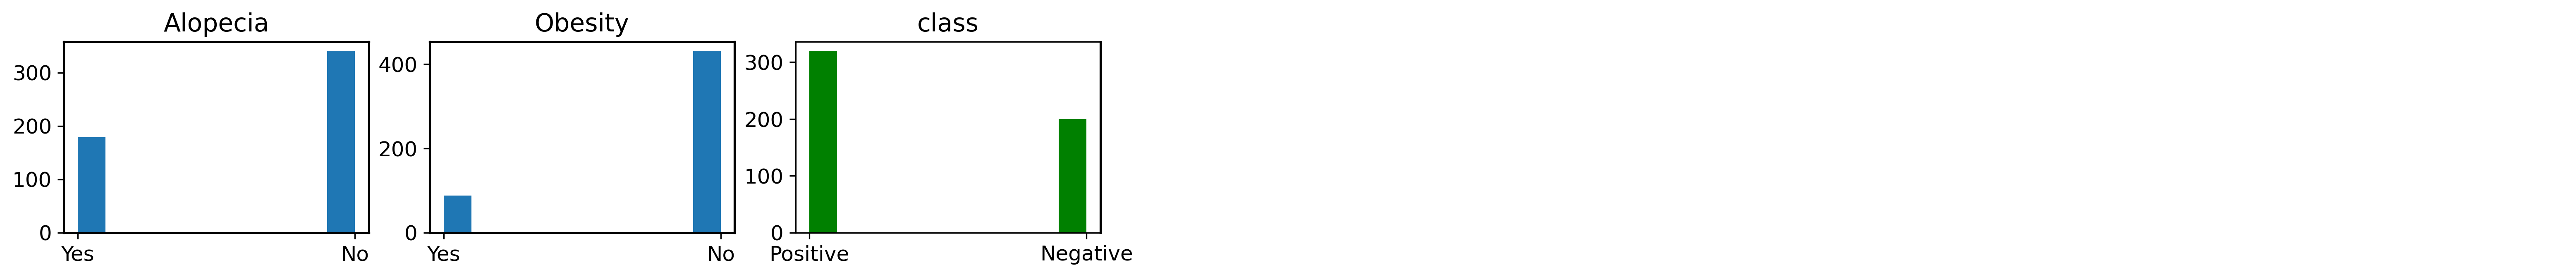

In [211]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

plt.rcParams.update({'font.size': 12})

fig, axes = plt.subplots(ncols=7, figsize = (26,2))
for i in enumerate(list(diabetes.columns)[14:16]):
    for axis in ['top','bottom','left','right']:
        _ = axes[i[0]].spines[axis].set_linewidth(1.25)
    _ = axes[i[0]].hist(diabetes[i[1]])
    _ = axes[i[0]].set_title(i[1])
#output variable is denoted in orange
_ = axes[2].spines[axis].set_linewidth(1.25)
_ = axes[2].hist(diabetes["class"], color="green")
_ = axes[2].set_title("class")
#hide axes 4 until 6 (7 means, until 7, excluding 7. So don't get confused):
for i in range(3,7):
    axes[i].axis("off")

# Additional information

## Changing plot sizes

In case you want to change the size of the plot that you want to use in the report, you can do the following: Change the figsize argument. See the following as an example.

Say you are unhappy with the size of the plot for the Postures Class histogram:

<BarContainer object of 6 artists>

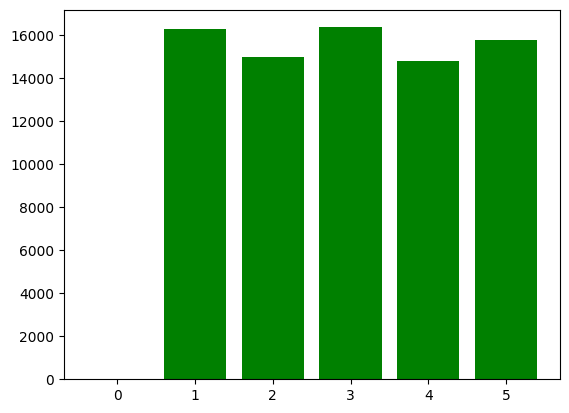

In [28]:
fig, ax = plt.subplots()
ax.bar(posturesY.value_counts().index.values, posturesY.value_counts().to_list(), color="green")

While you may have a figsize parameter in some other plots in this notebook, you don't see one here. Add the figsize parameter here and change the values.

figsize=(2,2):

<BarContainer object of 6 artists>

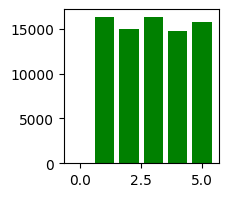

In [26]:
fig, ax = plt.subplots(figsize=(2,2))
ax.bar(posturesY.value_counts().index.values, posturesY.value_counts().to_list(), color="green")

Note how the text becomes smaller and the space becomes larger. Smaller plots can sometimes be scaled up by Jupyter. You'd use this (2,2) sized plot as a small graphic in the report.

The following is a (10,10) sized plot and is more appropriate for a bigger graphic in the report.

<BarContainer object of 6 artists>

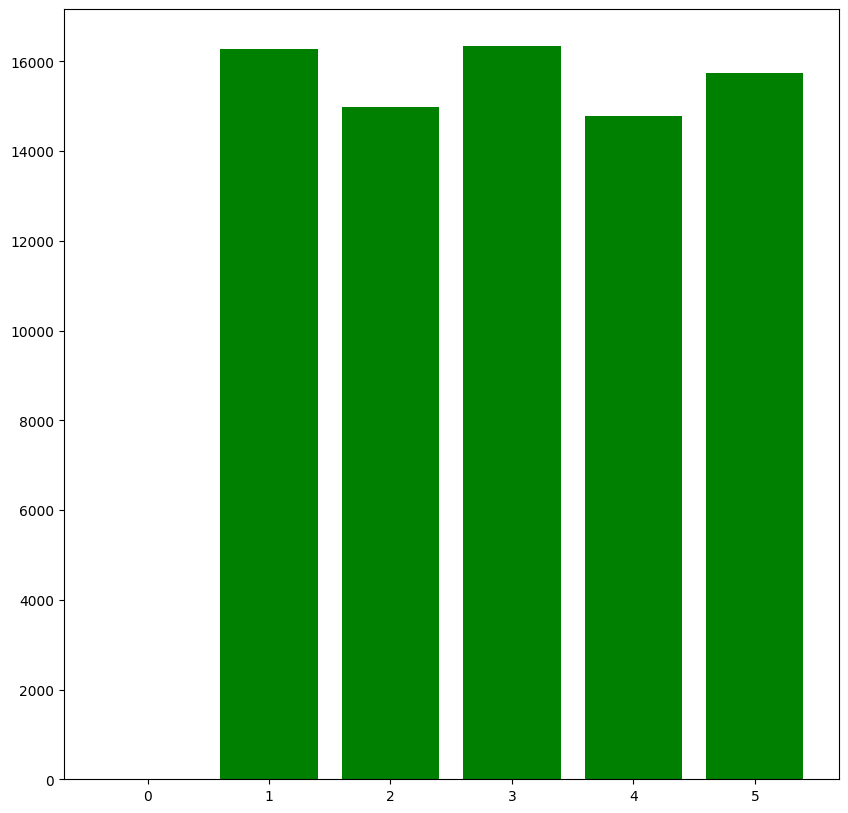

In [27]:
fig, ax = plt.subplots(figsize=(10,10))
ax.bar(posturesY.value_counts().index.values, posturesY.value_counts().to_list(), color="green")